In [1]:
#Arfan Rahman 
import tensorflow as tf

In [2]:

import matplotlib.pyplot as plt 

In [3]:
from tensorflow.keras import models,layers

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"C:\Potato-Disease-App\PlantVillage",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

In [8]:
68*32

2176

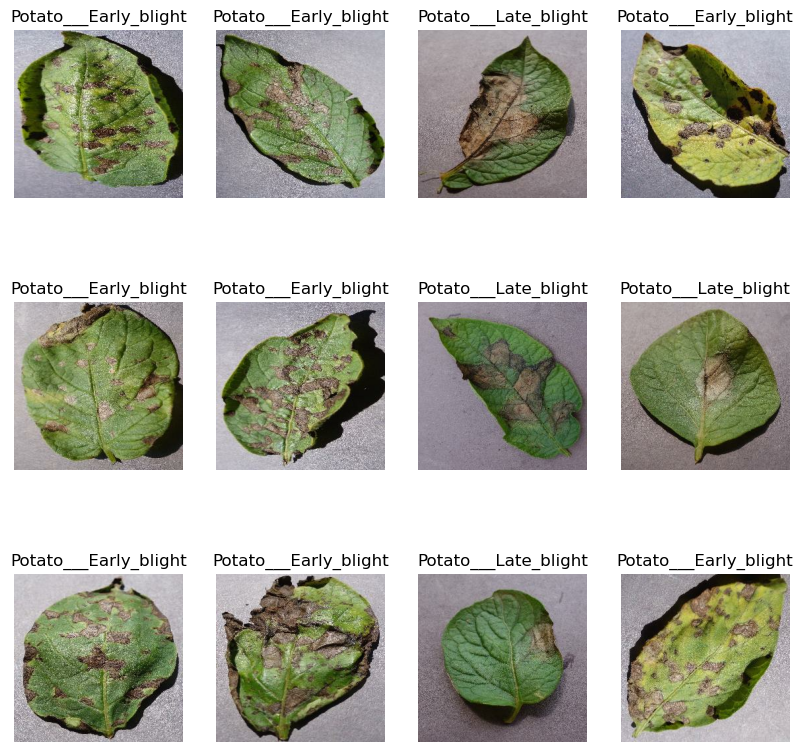

In [9]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
 for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [10]:
len(dataset)

68

In [11]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_DS = dataset.take(54)
len(train_DS)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [14]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [15]:
 val_ds = test_ds.take(6)
 len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size  = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    
    return train_ds, val_ds, test_ds

In [18]:
train_DS, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(train_DS)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [22]:
train_DS.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [27]:
model.compile(
optimizer= 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics = ['accuracy']
)

In [28]:
history = model.fit(
    train_DS,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/10
54/54 [==============================] - 66s 1s/step - loss: 0.8908 - accuracy: 0.4988 - val_loss: 0.7759 - val_accuracy: 0.6875
Epoch 2/10
54/54 [==============================] - 62s 1s/step - loss: 0.5688 - accuracy: 0.7277 - val_loss: 0.3650 - val_accuracy: 0.8452
Epoch 3/10
54/54 [==============================] - 62s 1s/step - loss: 0.3459 - accuracy: 0.8582 - val_loss: 0.1809 - val_accuracy: 0.9375
Epoch 4/10
54/54 [==============================] - 63s 1s/step - loss: 0.2233 - accuracy: 0.9079 - val_loss: 0.2395 - val_accuracy: 0.9271
Epoch 5/10
54/54 [==============================] - 62s 1s/step - loss: 0.1978 - accuracy: 0.9184 - val_loss: 0.1387 - val_accuracy: 0.9271
Epoch 6/10
54/54 [==============================] - 62s 1s/step - loss: 0.1635 - accuracy: 0.9366 - val_loss: 0.0996 - val_accuracy: 0.9635
Epoch 7/10
54/54 [==============================] - 65s 1s/step - loss: 0.1064 - accuracy: 0.9583 - val_loss: 0.1099 - val_accuracy: 0.9531
Epoch 8/10
54/54 [==

In [29]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 230ms/step - loss: 0.0450 - accuracy: 0.9805


In [30]:
scores

[0.04504086822271347, 0.98046875]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
history.history['accuracy']

[0.4988262951374054,
 0.7276995182037354,
 0.8582175970077515,
 0.9078638553619385,
 0.9184272289276123,
 0.9366196990013123,
 0.9583333134651184,
 0.9401408433914185,
 0.934272289276123,
 0.9741784334182739]

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

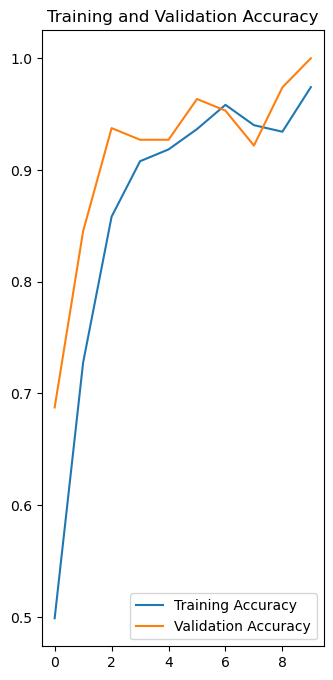

In [37]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 289ms/step
predicted label: Potato___Early_blight


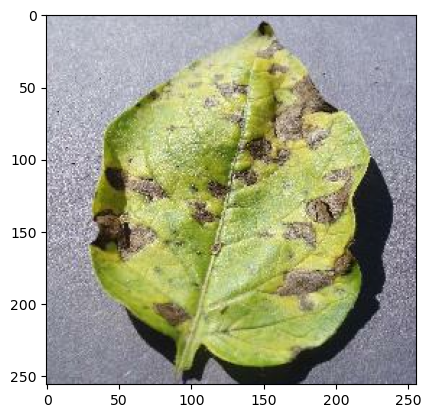

In [48]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])
    

In [50]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #creates a batch
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


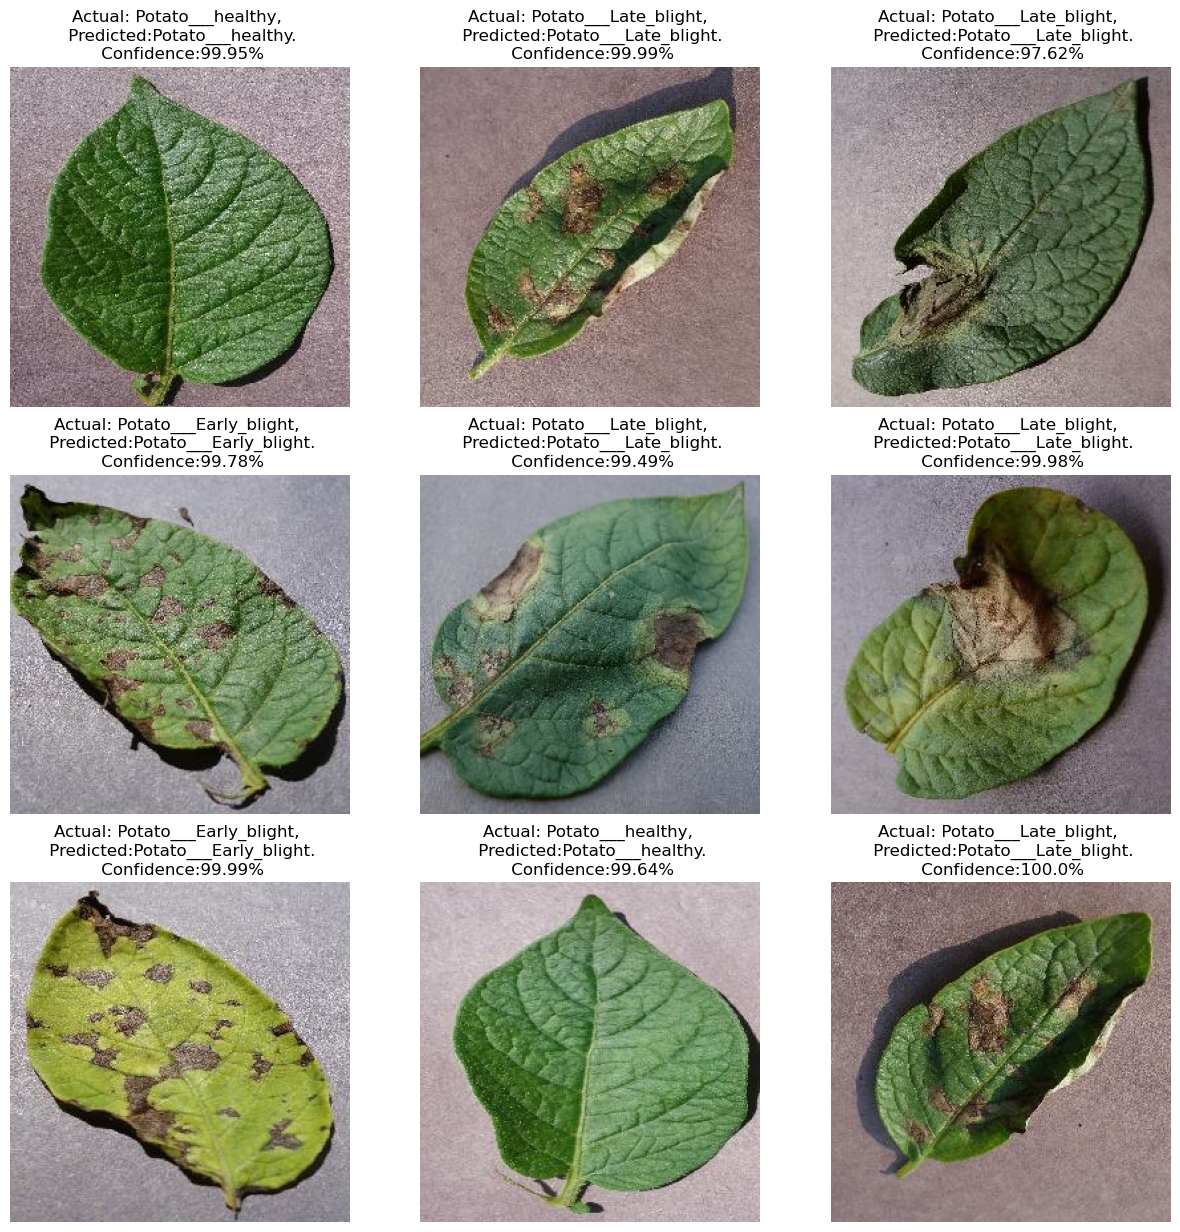

In [58]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        plt.axis("off")